In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

# Handle Null Date

In [3]:

train_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [4]:
test_data.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [5]:
train_data[train_data['Gender'] == 'F']['Age'].median()

37.0

In [6]:
train_data['Work_Life_balance'].mode()

0    1.0
dtype: float64

In [7]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

train_data['Time_of_service'].fillna(train_data['Time_of_service'].mode()[0], inplace=True)
test_data['Time_of_service'].fillna(test_data['Time_of_service'].mode()[0], inplace=True)

train_data['Pay_Scale'].fillna(train_data['Pay_Scale'].median(), inplace=True)
test_data['Pay_Scale'].fillna(test_data['Pay_Scale'].median(), inplace=True)

train_data['Work_Life_balance'].fillna(train_data['Work_Life_balance'].mode()[0], inplace=True)
test_data['Work_Life_balance'].fillna(test_data['Work_Life_balance'].mode()[0], inplace=True)

train_data['VAR2'].fillna(train_data['VAR2'].mode()[0], inplace=True)
test_data['VAR2'].fillna(test_data['VAR2'].mode()[0], inplace=True)

train_data['VAR4'].fillna(train_data['VAR4'].mode()[0], inplace=True)
test_data['VAR4'].fillna(test_data['VAR4'].mode()[0], inplace=True)

In [8]:
train_data.shape

(7000, 24)

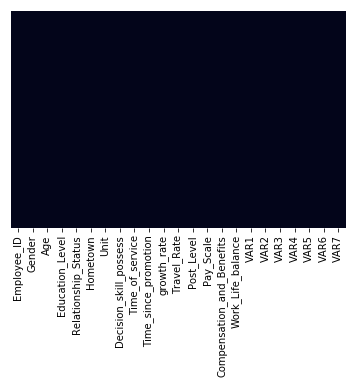

In [9]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False)

# Data Exploration

In [10]:
train_data.head(10)

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,2.0,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827
5,EID_2278,M,54.0,3,Married,Lebanon,Purchasing,Conceptual,19.0,1,...,type2,1.0,3,-1.8176,1.8688,2.0,2,8,3,0.7613
6,EID_18588,F,21.0,4,Married,Springfield,Purchasing,Directive,2.0,1,...,type2,2.0,3,-0.9612,0.7075,2.0,3,7,3,0.2819
7,EID_1235,F,37.0,3,Married,Springfield,Sales,Directive,34.0,4,...,type3,2.0,3,-0.1048,-0.4537,2.0,3,9,3,0.1169
8,EID_10197,M,40.0,4,Single,Springfield,Production,Analytical,13.0,1,...,type0,4.0,1,0.7516,1.8688,2.0,5,6,3,0.1968
9,EID_21262,M,45.0,3,Married,Lebanon,IT,Directive,21.0,4,...,type3,4.0,3,0.7516,-0.4537,2.0,4,8,3,0.2870


In [11]:
from scipy import stats
max(stats.zscore(train_data['Time_of_service']))

2.887262955308114

In [12]:
test_data['Age'].describe()

count    3000.000000
mean       39.701333
std        13.140587
min        19.000000
25%        28.000000
50%        38.000000
75%        51.000000
max        65.000000
Name: Age, dtype: float64

In [13]:
train_data['Time_of_service'].value_counts()

6.0     689
5.0     503
3.0     471
4.0     439
2.0     297
8.0     276
7.0     258
10.0    218
9.0     205
13.0    195
12.0    191
15.0    178
11.0    178
14.0    175
0.0     162
18.0    154
16.0    150
22.0    146
20.0    142
21.0    137
24.0    129
1.0     127
17.0    124
19.0    122
23.0    118
25.0    117
27.0    114
28.0    113
26.0    109
30.0     98
31.0     86
29.0     82
33.0     71
32.0     65
35.0     60
34.0     55
37.0     51
36.0     51
38.0     48
39.0     29
40.0     24
41.0     18
42.0     17
43.0      8
Name: Time_of_service, dtype: int64

In [14]:
test_data['Age'].value_counts()

38.0    207
22.0    112
27.0    105
52.0    100
26.0     95
30.0     95
37.0     94
54.0     92
45.0     90
60.0     89
25.0     85
42.0     84
35.0     83
28.0     83
32.0     81
24.0     79
47.0     77
21.0     71
31.0     65
19.0     62
65.0     61
23.0     60
59.0     58
50.0     55
20.0     54
41.0     49
58.0     48
56.0     46
53.0     45
57.0     44
43.0     44
48.0     43
40.0     42
34.0     41
33.0     41
55.0     41
49.0     40
29.0     39
51.0     39
44.0     38
39.0     37
46.0     34
36.0     32
62.0     32
63.0     30
64.0     30
61.0     28
Name: Age, dtype: int64

# One Hot encode the categorical columns and delete originals

In [15]:
cat_columns = ['Gender','Education_Level','Relationship_Status','Unit','Decision_skill_possess','Travel_Rate',
                'Post_Level','Pay_Scale','Compensation_and_Benefits','Work_Life_balance','VAR1','VAR2','VAR3',
               'VAR4','VAR5','VAR6','VAR7']

In [16]:
len(cat_columns)

17

In [17]:
train = train_data.copy()
test = test_data.copy()

In [18]:
for column in cat_columns:
  train = pd.concat([train,pd.get_dummies(train[column], prefix=column)], axis=1)
  test = pd.concat([test,pd.get_dummies(test[column], prefix=column)], axis=1)

In [19]:
train = train.drop(cat_columns, axis=1)
test = test.drop(cat_columns, axis=1)


In [20]:
train.shape

(7000, 93)

In [21]:
test.shape

(3000, 92)

In [22]:
train

,Employee_ID,Age,Hometown,Time_of_service,Time_since_promotion,growth_rate,Attrition_rate,Gender_F,Gender_M,Education_Level_1,...,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
0,EID_23371,42.0,Franklin,4.0,4,33,0.1841,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,EID_18000,24.0,Springfield,5.0,4,36,0.0670,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,EID_3891,58.0,Clinton,27.0,3,51,0.0851,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,EID_17492,26.0,Lebanon,4.0,3,56,0.0668,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,EID_22534,31.0,Springfield,5.0,4,62,0.1827,1,0,1,...,0,0,0,1,0,0,1,0,0,0
5,EID_2278,54.0,Lebanon,19.0,1,21,0.7613,0,1,0,...,0,0,0,1,0,0,0,1,0,0
6,EID_18588,21.0,Springfield,2.0,1,50,0.2819,1,0,0,...,0,0,1,0,0,0,0,1,0,0
7,EID_1235,37.0,Springfield,34.0,4,23,0.1169,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8,EID_10197,40.0,Springfield,13.0,1,49,0.1968,0,1,0,...,0,1,0,0,0,0,0,1,0,0
9,EID_21262,45.0,Lebanon,21.0,4,34,0.2870,0,1,0,...,0,0,0,1,0,0,0,1,0,0


# Perform Data Normalization


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['Time_of_service'] = pd.DataFrame(scaler.fit_transform(train[['Time_of_service']]))
train['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(train[['Time_since_promotion']]))
train['growth_rate'] = pd.DataFrame(scaler.fit_transform(train[['growth_rate']]))
train['Age'] = pd.DataFrame(scaler.fit_transform(train[['Age']]))

In [24]:
test['Time_of_service'] = pd.DataFrame(scaler.fit_transform(test[['Time_of_service']]))
test['Time_since_promotion'] = pd.DataFrame(scaler.fit_transform(test[['Time_since_promotion']]))
test['growth_rate'] = pd.DataFrame(scaler.fit_transform(test[['growth_rate']]))
test['Age'] = pd.DataFrame(scaler.fit_transform(test[['Age']]))

In [25]:
train

,Employee_ID,Age,Hometown,Time_of_service,Time_since_promotion,growth_rate,Attrition_rate,Gender_F,Gender_M,Education_Level_1,...,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
0,EID_23371,0.500000,Franklin,0.093023,1.00,0.240741,0.1841,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,EID_18000,0.108696,Springfield,0.116279,1.00,0.296296,0.0670,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,EID_3891,0.847826,Clinton,0.627907,0.75,0.574074,0.0851,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,EID_17492,0.152174,Lebanon,0.093023,0.75,0.666667,0.0668,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,EID_22534,0.260870,Springfield,0.116279,1.00,0.777778,0.1827,1,0,1,...,0,0,0,1,0,0,1,0,0,0
5,EID_2278,0.760870,Lebanon,0.441860,0.25,0.018519,0.7613,0,1,0,...,0,0,0,1,0,0,0,1,0,0
6,EID_18588,0.043478,Springfield,0.046512,0.25,0.555556,0.2819,1,0,0,...,0,0,1,0,0,0,0,1,0,0
7,EID_1235,0.391304,Springfield,0.790698,1.00,0.055556,0.1169,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8,EID_10197,0.456522,Springfield,0.302326,0.25,0.537037,0.1968,0,1,0,...,0,1,0,0,0,0,0,1,0,0
9,EID_21262,0.565217,Lebanon,0.488372,1.00,0.259259,0.2870,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [26]:
test

,Employee_ID,Age,Hometown,Time_of_service,Time_since_promotion,growth_rate,Gender_F,Gender_M,Education_Level_1,Education_Level_2,...,VAR6_5,VAR6_6,VAR6_7,VAR6_8,VAR6_9,VAR7_1,VAR7_2,VAR7_3,VAR7_4,VAR7_5
0,EID_22713,0.282609,Springfield,0.162791,1.00,0.185185,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,EID_9658,1.000000,Lebanon,0.953488,0.50,0.962963,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,EID_22203,0.717391,Springfield,0.488372,0.75,0.092593,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,EID_7652,0.673913,Washington,0.255814,1.00,0.148148,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,EID_6516,0.543478,Franklin,0.279070,1.00,0.500000,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,EID_20283,0.065217,Franklin,0.069767,0.25,0.611111,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
6,EID_21014,0.500000,Washington,0.139535,1.00,0.277778,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
7,EID_7693,0.478261,Springfield,0.093023,1.00,0.277778,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8,EID_13232,0.260870,Springfield,0.162791,0.75,0.981481,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
9,EID_6515,0.630435,Springfield,0.372093,0.25,0.222222,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


# Delete irrevelavt columns

In [27]:
train = train.drop(['Employee_ID','Hometown'], axis=1)
test = test.drop(['Employee_ID','Hometown'], axis=1)

In [28]:
x_train = train.drop(['Attrition_rate'], axis=1)
y_train = train['Attrition_rate']

In [29]:
x_train.shape

(7000, 90)

In [30]:
y_train.shape

(7000,)

In [31]:
test.shape

(3000, 90)

# Training

# XGB Regression

In [32]:

import xgboost

C:\Users\Deepak\anaconda3\lib\site-packages\dask\config.py:129: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [33]:
regressor=xgboost.XGBRegressor()

In [34]:
n_estimators = [500, 700, 900, 1100, 1300]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree','gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

In [35]:
hyperparameter_grid = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth,
    'learning_rate' : learning_rate,
    'min_child_weight' : min_child_weight,
    'booster' : booster,
    'base_score' : base_score
}

# Random forest Regressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [37]:
hyperparameter_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [38]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=3, n_iter=100,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 2, 
            return_train_score = True,
            random_state=42)

In [39]:
random_cv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 44.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [40]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=1400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [41]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=4, missing=None, n_estimators=1100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [42]:
regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=75, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
y_pred = regressor.predict(test)

In [45]:
y_pred.shape

(3000,)

In [46]:
y_pred

array([0.24439533, 0.23344733, 0.16812133, ..., 0.13353333, 0.19236287,
       0.20894978])

In [49]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv("Test.csv")
datasets = pd.concat([sub_df['Employee_ID'],pred], axis=1)
datasets.columns = ['Employee_ID', 'Attrition_rate']
datasets.to_csv('Final.csv', index=False)